EDA_WeRateDogs

In [3]:
#loading libraries

import zipfile
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import datetime
#import tweepy
#from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests

Data Gathering

Introduction

At this stage, we will collect the data needed for the project. In this case, we will be utilizing the welovedogs Twitter data. We have three data sets to import in this project: a csv file, a tsv file, and a json file.

About Welovedogs

The WeRateDogs Twitter archive includes basic tweet data for all of their 5000+ tweets, but not everything. The archive does include one column, however: the text of each tweet, which was used to extract the rating, dog name, and dog "stage" (i.e., doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced."
We will clean the data for quality as well as tidiness in this project. We will have wonderful insights about the data at the end of the cleaning.

In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# We have to save it to an TSV file called image_predictions.tsv
with open("image_predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [6]:
# now lets read the file using pandas
image_pred = pd.read_csv("image_predictions.tsv", sep="\t")
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Ref: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

We have also loaded the tsv file from the url provided and saved it into image_predictions.tsv file.

In [7]:
# set a function for tweet extraction
# file already created so no need to execute to continue the notebook
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('../input/weratedogs-twitter-dataset/tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [8]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [9]:
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])
tweet_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


After a long and arduous journey to import our final data.

We had to create a new python file and rename our json file because it kept on saving as text file and was troublesome with lots of errors. 

Analyzing the data

This was very insightful because finding the messy and dirty areas in the data requires a third eye. I analyzed the data visually and programmatically and discovered a massive pile of dirt that needed to be cleaned.

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [11]:
twitter_archive.name.value_counts().head(60)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Reginald      4
Maggie        4
Luna          4
Maddie        4
Dexter        4
Jerry         4
Carl          4
Ruby          4
Riley         4
Clark         4
Name: name, dtype: int64

In [12]:
doggo = twitter_archive.doggo.value_counts().head(10)
floofer = twitter_archive.floofer.value_counts().head(10)
pupper = twitter_archive.pupper.value_counts().head(10)
puppo = twitter_archive.puppo.value_counts().head(10)

In [13]:
doggo

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
floofer

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
pupper

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
puppo

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
image_pred[image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Quality Issues

twitter_archive

- Drop some features that are not needed
- Erroneous datatype
- Lower case names for names
- Mistakes on dog ratings
- Replace unidentified names into none

Tweet_count

- Fix column name from id_str to tweet_id
- Erroneous datatype

Image_pred

- Drop likely predictions that are not true(meaning they are not dogs)
- Tidiness

twitter_archive

- Rating should be in a single column
- Clean up text column by taking out the url at the end of some text

All Datasets

- merging tables

Data Cleaning

Now to the cleaning section of our project. We have successfully assessed our data and discovered some issues that require cleaning, which will be addressed as we progress.

First, we must duplicate the original datasets that were collected.

In [20]:
#Making a copy of the original data collected

image_pred_clean = image_pred.copy()
twitter_archive_clean = twitter_archive.copy()
tweet_count_clean = tweet_count.copy()

Issue #1: We are going Drop some features that are not necessary 

Define:

We will use the drop function to remove some unnecessary features ("in reply to status id", "in reply to user id", "retweeted status id", "retweeted status user id", "retweeted status timestamp").

In [21]:
twitter_archive_clean = twitter_archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


We now have a total of 12 columns to work with.

Issue #2: Erroneous datatype

Define:

we will use the astype function to change datatypes timestamp to datetime64 and name, text, doggo, floofler, pupper, puppo, id_str to string

In [22]:
#changing datatypes

twitter_archive_clean[['timestamp']] = twitter_archive_clean[['timestamp']].astype('datetime64')
twitter_archive_clean[['name']] = twitter_archive_clean[['name']].astype('string')
twitter_archive_clean[['text']] = twitter_archive_clean[['text']].astype('string')
twitter_archive_clean[['doggo']] = twitter_archive_clean[['doggo']].astype('string')
twitter_archive_clean[['floofer']] = twitter_archive_clean[['floofer']].astype('string')
twitter_archive_clean[['pupper']] = twitter_archive_clean[['pupper']].astype('string')
twitter_archive_clean[['puppo']] = twitter_archive_clean[['puppo']].astype('string')
tweet_count_clean[['id_str']] = tweet_count_clean[['id_str']].astype('int64')

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   string        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   string        
 8   doggo               2356 non-null   string        
 9   floofer             2356 non-null   string        
 10  pupper              2356 non-null   string        
 11  puppo               2356 non-null   string        
dtypes: datetime64[ns](1), int64(3), object(2), string(6)
memory usage: 221.0+ KB


With the astype function we have succeeded in changing data types for both the twitter_archive_clean data and tweet_count_clean datasets

Issue #3: Fix column names

Define: 

To be consistent with other id values, we will use the rename function on the id str column in the tweet count clean dataset.

In [24]:
tweet_count_clean.rename(index = int, columns={"id_str" : "tweet_id"}, inplace = True)
tweet_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 73.6 KB


We noticed the difference after confirmation.

Issue #4: Lower case names for column name

Define: 

To ensure consistency in naming, we will use lowercase names in the twitter_archive_clean and image_pred datasets.

In [25]:
#twitter_archive

twitter_archive_clean.name=twitter_archive_clean.name.str.lower()
twitter_archive_clean.doggo=twitter_archive_clean.doggo.str.lower()
twitter_archive_clean.floofer=twitter_archive_clean.floofer.str.lower()
twitter_archive_clean.pupper=twitter_archive_clean.pupper.str.lower()
twitter_archive_clean.puppo=twitter_archive_clean.puppo.str.lower()

#image_pred

image_pred.p1=image_pred.p1.str.lower()
image_pred.p2=image_pred.p2.str.lower()
image_pred.p3=image_pred.p2.str.lower()

Issue #5: Mistakes on dog ratings

Define: 

Dog rating errors with indexes (313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335 for incorrect values) and (45, 340, 695, 763, 1689, 1712 for mistakes after decimals).

The majority of these values were discovered during the visual cleaning of the datasets on Excel.

In [26]:
#finding inconsitent factions from text

twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", 
                                                                                    "rating_denominator"]]

C:\Users\Will\AppData\Local\Temp\ipykernel_7328\1340723255.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator",


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


In [27]:
#Confused dog ratings 

(313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335)
twitter_archive_clean.iloc[[313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335], [3,5,6]]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
1068,"After so many requests, this is Bretagne. She ...",9,11
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1662,This is Darrel. He just robbed a 7/11 and is i...,7,11
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2


We will now change the values and view them after analyzing the data.

In [28]:
#rating mistaken for 4/20

twitter_archive_clean.iloc[1165, 5] = 13
twitter_archive_clean.iloc[1165, 6] = 10

#rating mistaken for 50/50 split in text
twitter_archive_clean.iloc[1202, 5] = 11
twitter_archive_clean.iloc[1202, 6] = 10

#rating mistaken for 7/11 which is name of convience store
twitter_archive_clean.iloc[1662, 5] = 10
twitter_archive_clean.iloc[1662, 6] = 10

#rating mistaken for 1/2 half legged
twitter_archive_clean.iloc[2335, 5] = 9
twitter_archive_clean.iloc[2335, 6] = 10

#rating mistaken for values after the decimal points
twitter_archive_clean.iloc[45, 5] = 13.5
twitter_archive_clean.iloc[695, 5] = 9.75
twitter_archive_clean.iloc[763, 5] = 11.27
twitter_archive_clean.iloc[1689, 5] = 9.5
twitter_archive_clean.iloc[1712, 5] = 11.26

In this section, we will use the iloc function to locate and repair the indexes that has problems.

In [29]:
#for confermation

twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", "rating_denominator"]]

C:\Users\Will\AppData\Local\Temp\ipykernel_7328\678253539.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", "rating_denominator"]]


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,13.50,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.00,10
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1689,I've been told there's a slight possibility he...,9.50,10
1712,Here we have uncovered an entire battalion of ...,11.26,10


We confirmed the changes made here.

In [30]:
#confirmation

twitter_archive_clean.iloc[[313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335], [3,5,6]]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960.0,0
342,@docmisterio account started on 11/15/15,11.0,15
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7
784,"RT @dog_rates: After so many requests, this is...",9.0,11
1068,"After so many requests, this is Bretagne. She ...",9.0,11
1165,Happy 4/20 from the squad! 13/10 for all https...,13.0,10
1202,This is Bluebert. He just saw that both #Final...,11.0,10
1662,This is Darrel. He just robbed a 7/11 and is i...,10.0,10
2335,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10


We confirmed the changes made here.

Issue #6: # replace the unidentified names into none

Define: 

On the twitter_archive_clean dataset's name column, replace 'a', 'all', 'an', 'by', 'his', 'just','my', 'not','such', 'the', 'this','very' with none.

In [31]:
# replace the stopwords into none

unidentified_names = (["a", "all", "an", "by", "his", "just", "my", "not", "such", "the", "this", "very"])

In [32]:
for x in unidentified_names:
    twitter_archive_clean["name"].replace(x, "none", inplace = True)
twitter_archive_clean.name.value_counts().head(10)

none       832
charlie     12
oliver      11
cooper      11
lucy        11
penny       10
lola        10
tucker      10
winston      9
bo           9
Name: name, dtype: Int64

Issue #7: Drop likely predictions that are not true

Define: 

In the image_pred dataset, we will replace likely predictions that are not true (meaning they are not dogs) with NAN values and then drop the NAN values because we are only interested in dog predictions.

In [33]:
image_pred_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
image_pred_clean["p1_dog"].replace(False, np.nan, inplace = True)
image_pred_clean["p2_dog"].replace(False, np.nan, inplace = True)
image_pred_clean["p3_dog"].replace(False, np.nan, inplace = True)

In [35]:
#We will apply the drop function to dropthe nan values

image_pred_clean.p1_dog.dropna()
image_pred_clean.p2_dog.dropna()
image_pred_clean.p3_dog.dropna()

0       True
1       True
2       True
3       True
4       True
        ... 
2066    True
2067    True
2070    True
2072    True
2073    True
Name: p3_dog, Length: 1499, dtype: object

Issue #8: Clean up text column by taking out the url at the end.

Define: 

We will use the replace function to replace whitespaces in the text column before using the strip function to remove them.

In [36]:
#Clean up text column by taking out the url at the end of the text column

twitter_archive_clean['text'] = twitter_archive_clean.text.str.replace(r"http\S+", "")
twitter_archive_clean['text'] = twitter_archive_clean.text.str.strip()

C:\Users\Will\AppData\Local\Temp\ipykernel_7328\2987894690.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_clean['text'] = twitter_archive_clean.text.str.replace(r"http\S+", "")


In [37]:
#checking for the effect of the last line by searching for http in the text column

twitter_archive_clean.query("text == 'http'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Using the query function, we confirmed that no values in the text column begin with http.

Tidiness Issues

Issue #9: Clean up text column by taking out the url at the end

Define: 

On the twitter_archive_clean dataset, we will add a new column called rating that will be the division(rating numerator/rating denominator).

In [38]:
#Rating should be in a single column

twitter_archive_clean["rating"] = twitter_archive_clean["rating_numerator"]/twitter_archive_clean["rating_denominator"]

In [39]:
twitter_archive_clean.rating.describe()

count    2356.0
mean        inf
std         NaN
min         0.0
25%         1.0
50%         1.1
75%         1.2
max         inf
Name: rating, dtype: float64

For Confirmation

In [40]:
#i think we still have to take out some more columns now(expanded_urls","rating_numerator","rating_denominator")

twitter_archive_clean = twitter_archive_clean.drop(["expanded_urls","rating_numerator","rating_denominator"], axis=1)

In [41]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,phineas,none,none,none,none,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,tilly,none,none,none,none,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,archie,none,none,none,none,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,darla,none,none,none,none,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,franklin,none,none,none,none,1.2


In order to be certain,

N:B This is just a side manipulation that will be used later to gain insights.
The tweet archieve clean dataset's timestamp column was used to create a new column tweet day.

In [42]:
#for insights
twitter_archive_clean["tweet_day"] = twitter_archive_clean["timestamp"].dt.strftime("%a")

In [43]:
twitter_archive_clean["tweet_day"].value_counts()

Mon    384
Tue    356
Wed    354
Fri    333
Thu    326
Sat    309
Sun    294
Name: tweet_day, dtype: int64

We've seen the value counts for tweets made on specific days of the week.

Issue #10: Merge the files

Define: 

For this merge, the id str column needed to be changed to tweet_id.
First, we'll combine the twitter_archive_clean and twitter_count clean functions on the tweet_id. The resulting dataframe will then be first merge with image_pred on the tweet_id column.

In [44]:
first_merge = pd.merge(twitter_archive_clean, tweet_count_clean,
                            on=["tweet_id"])

In [45]:
twitter_archive_master = pd.merge(first_merge, image_pred_clean,
                            on=["tweet_id"], how="left")

In [46]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,phineas,none,none,none,none,1.3,...,1.0,orange,0.097049,NaN,bagel,0.085851,NaN,banana,0.076110,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,tilly,none,none,none,none,1.3,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,archie,none,none,none,none,1.2,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,darla,none,none,none,none,1.3,...,1.0,paper_towel,0.170278,NaN,Labrador_retriever,0.168086,True,spatula,0.040836,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,franklin,none,none,none,none,1.2,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Storing Data

The merged datasets will be saved to a CSV file called "twitter_archive_master.csv" after they have been gathered, assessed, and cleaned.

In [47]:
#saving into a csv file

twitter_archive_master.to_csv(r"twitter_archive_master.csv", index=False)

Analyzing and Visualizing Data

We will analyze and visualize the data in this section based on these insights.

Insights

1. Explore the data description
2. Learn the strength of relationship between the dog ratings, retweets, favorites and img number and dog predictions p1-p3
3. Learn which day had higher retweets and favourites.

In [48]:
#Make a copy of twitter_archive_master in other to drive insights

df_master = twitter_archive_master.copy()

In [49]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2354 non-null   int64         
 1   timestamp       2354 non-null   datetime64[ns]
 2   source          2354 non-null   object        
 3   text            2354 non-null   string        
 4   name            2354 non-null   string        
 5   doggo           2354 non-null   string        
 6   floofer         2354 non-null   string        
 7   pupper          2354 non-null   string        
 8   puppo           2354 non-null   string        
 9   rating          2354 non-null   float64       
 10  tweet_day       2354 non-null   object        
 11  retweet_count   2354 non-null   int64         
 12  favorite_count  2354 non-null   int64         
 13  jpg_url         2073 non-null   object        
 14  img_num         2073 non-null   float64       
 15  p1  

Insight #1

Explore the data description

In [50]:
# Here we describe the data to assess the data discription using the describe function

df_master.describe().round(3)

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.354000e+03,2354.0,2354.000,2354.000,2073.000,2073.000,2073.000,2073.000
mean,7.426978e+17,inf,3164.797,8080.969,1.204,0.595,0.135,0.060
std,6.852812e+16,NaN,5284.770,11814.771,0.562,0.271,0.101,0.051
min,6.660209e+17,0.0,0.000,0.000,1.000,0.044,0.000,0.000
25%,6.783975e+17,1.0,624.500,1415.000,1.000,0.364,0.054,0.016
50%,7.194596e+17,1.1,1473.500,3603.500,1.000,0.588,0.119,0.049
75%,7.993058e+17,1.2,3652.000,10122.250,1.000,0.844,0.196,0.092
max,8.924206e+17,inf,79515.000,132810.000,4.000,1.000,0.488,0.273


Rating:

The gap between the 75th percentile and the maximum is quite large. This is due to some tweets receiving exorbitant ratings. Another point to avoid is the min with zero(0) rating that results from tweets that do not include a dog rating.

retweet count and favorite count: There was an average that showed that most tweets had more favorites than retweets.

img num: According to the description, the least image for a post with images is one, while some others have four. This is correct because Twitter only allows a maximum of four images in a single post.

p1-p3 conf: They should not be greater than one because they are confidence intervals. As a result, the values range from 0 to 1.

Insight 2

1. Learn the strength of the relationship between dog ratings, retweets, favorites, and image number and dog predictions p1-p3.
2. A visual plot depicting the relationship between variables is the best way to understand relationships. The hue of the sns.pairplot over the tweet day.

Let's plot a chart for visualizing

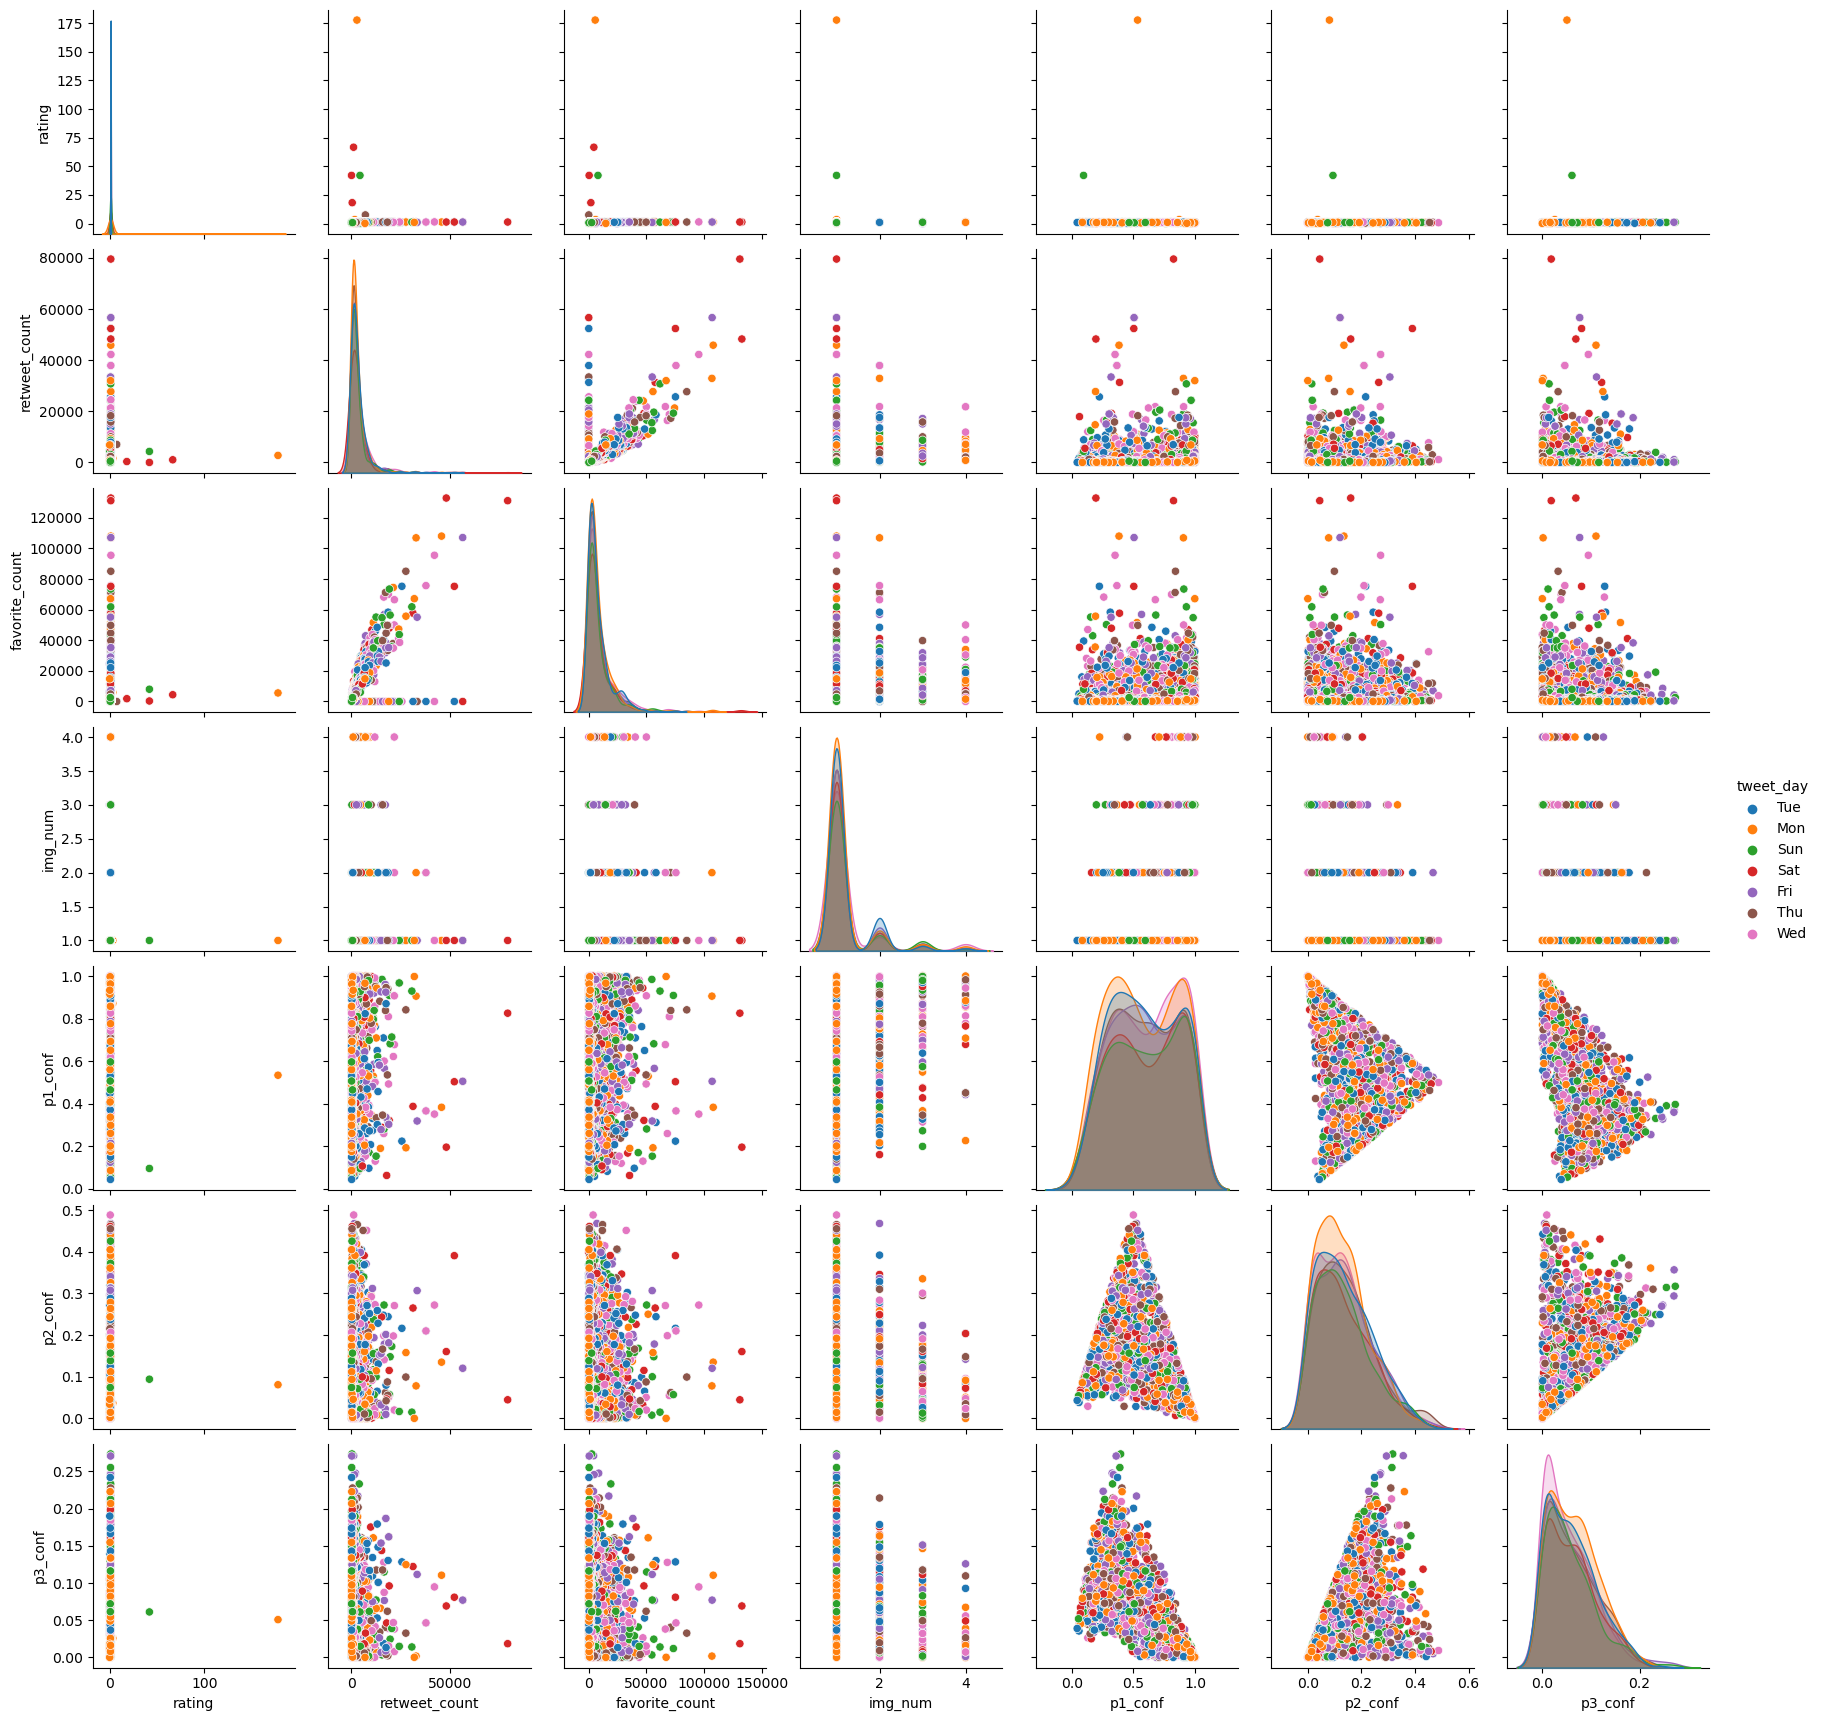

In [51]:
sns.pairplot(df_master, vars=["rating", "retweet_count", "favorite_count", "img_num", "p1_conf", "p2_conf", "p3_conf"], hue="tweet_day");

The relationship between retweet count and favorite count is the main takeaway from this chart. The correlation table below confirms this, showing a positive strength of 0.703. Given that the correlation coefficient ranges from 0 (no correlation) to 1 (perfect correlation), this value is close to 1, indicating a very good correlation.

In [52]:
#Correlation table rounded to the nearest three decimals

df_master.corr().round(3)

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.000,0.047,0.390,0.528,0.205,0.101,0.003,-0.043
rating,0.047,1.000,0.009,0.008,0.001,-0.008,-0.013,-0.005
retweet_count,0.390,0.009,1.000,0.703,0.106,0.045,-0.009,-0.036
favorite_count,0.528,0.008,0.703,1.000,0.132,0.076,-0.023,-0.053
img_num,0.205,0.001,0.106,0.132,1.000,0.203,-0.160,-0.139
p1_conf,0.101,-0.008,0.045,0.076,0.203,1.000,-0.512,-0.710
p2_conf,0.003,-0.013,-0.009,-0.023,-0.160,-0.512,1.000,0.479
p3_conf,-0.043,-0.005,-0.036,-0.053,-0.139,-0.710,0.479,1.000


Insight 3

Learn which day had higher retweets and favourites

In this section, we will first group the data into the sum of retweets and favorites made for a tweet, as well as the days on which these tweets were made, before sorting them by decending other. Following that, a def function for our charts will be created to reduce code repetition.

In [53]:
df_master_rf=df_master.groupby(["tweet_day"],as_index=False)["retweet_count", "favorite_count"].sum()
df_master_rf.sort_values(by=["retweet_count"], ascending = False).head(7)

C:\Users\Will\AppData\Local\Temp\ipykernel_7328\1004965128.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_master_rf=df_master.groupby(["tweet_day"],as_index=False)["retweet_count", "favorite_count"].sum()


,tweet_day,retweet_count,favorite_count
6,Wed,1306678,3180867
5,Tue,1179251,2846694
1,Mon,1116120,3063019
0,Fri,1030952,2588285
2,Sat,991830,2477944
4,Thu,960236,2508595
3,Sun,864866,2357196


In [54]:
#Creating a function for our chart

def top_rt(value1,value2,order):
    result1=df_master_rf.sort_values(value1, ascending = order).head(10)
    pl=sns.barplot(y=value2,x=value1,data=result1)
    title=plt.title ("Top 10 {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result1,pl,title,yl,xl

Retweets Counts by day of tweets in decending order

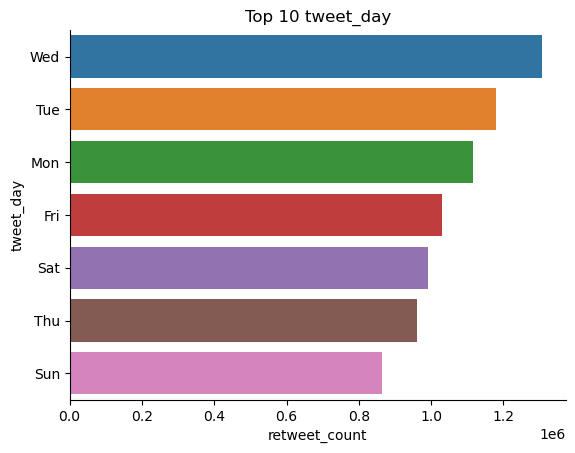

In [55]:
#plot for top retweet counts by day of week

top_rt('retweet_count','tweet_day', False)
sns.despine()

According to the horizontal bar chart above, Wednesday (midweek) had the highest number of retweets, followed by Tuesday and Monday. Surprisingly, Sunday, the weekend, came last. [#WOW...Are you serious?

Retweets Counts by day of tweets in decending order

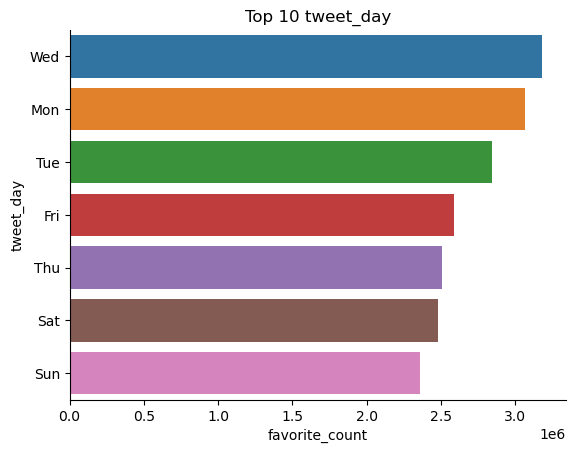

In [56]:
#plot for top favourite counts by day of week

top_rt('favorite_count','tweet_day', False)
sns.despine()

I've heard some shocking stories about tweets, but Sunday being the last day of the week twice in a row was one of them. Wednesdays remained on top this time, closely followed by Mondays.

I'll make another post on Wednesday.